In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [33]:
class BayesianLinearRegression:
    def __init__(self, alpha=2, beta=25, theta=None):
        self.alpha = alpha  # Precision of the prior
        self.beta = beta    # Precision of the noise
        self.theta = theta if theta is not None else np.array([-0.3, 0.5]) # Coefficients of the linear function
        self.prior_mean = np.zeros(2)
        self.prior_cov = np.eye(2) / self.alpha
        self.posterior_mean = self.prior_mean
        self.posterior_cov = self.prior_cov

    def linear_function(self, X):
        return self.theta[0] + self.theta[1] * X

    def likelihood_function(self, X, y):
        error = y - self.linear_function(X)
        return np.exp(-self.beta / 2 * np.sum(error ** 2))

    def update_prior(self, X, y):
        design_matrix = np.vstack((np.ones_like(X), X)).T
        self.posterior_cov = np.linalg.inv(np.linalg.inv(self.prior_cov) + self.beta * np.dot(design_matrix.T, design_matrix))
        self.posterior_mean = np.dot(self.posterior_cov, np.dot(np.linalg.inv(self.prior_cov), self.prior_mean) + self.beta * np.dot(design_matrix.T, y))
        self.prior_mean = self.posterior_mean
        self.prior_cov = self.posterior_cov

    def predictive_distribution(self, X):
        design_matrix = np.vstack((np.ones_like(X), X)).T
        mu_star = np.dot(design_matrix, self.posterior_mean)
        sigma_star = 1 / self.beta + np.sum(np.dot(design_matrix, self.posterior_cov) * design_matrix, axis=1)
        return mu_star, sigma_star

In [34]:
blr = BayesianLinearRegression()

In [35]:
# Generating synthetic data
np.random.seed(0)
X_data = np.linspace(0, 1, 100)
y_data = blr.linear_function(X_data) + np.random.normal(0, 1/np.sqrt(blr.beta), 100)

# Update the prior with the data
blr.update_prior(X_data, y_data)

# Predictive distribution for new data
X_new = np.linspace(0, 1, 100)
mu_star, sigma_star = blr.predictive_distribution(X_new)

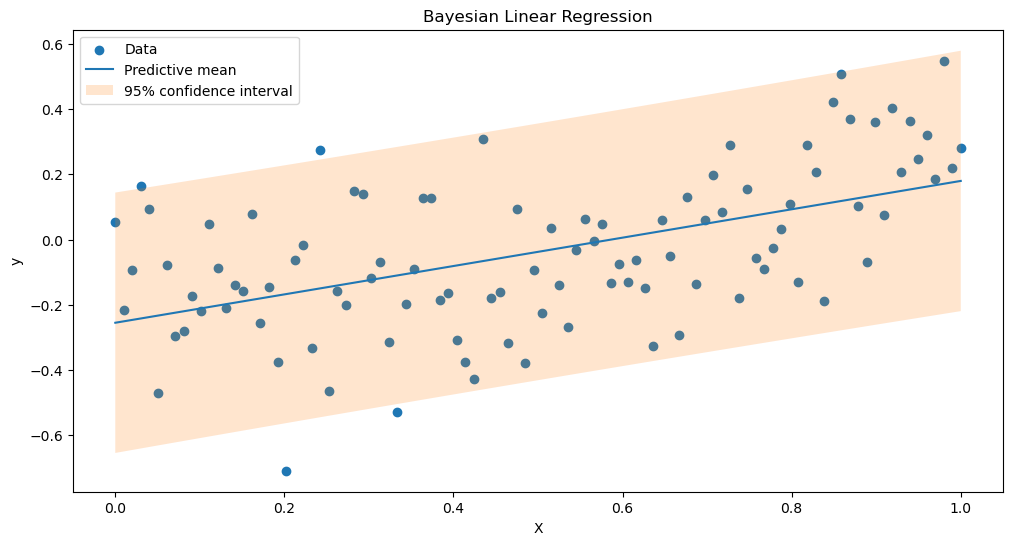

In [36]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(X_data, y_data, label="Data")
plt.plot(X_new, mu_star, label="Predictive mean")
plt.fill_between(X_new, mu_star - 1.96 * np.sqrt(sigma_star), mu_star + 1.96 * np.sqrt(sigma_star), alpha=0.2, label="95% confidence interval")
plt.title("Bayesian Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
